# Homework 0329

**Name**: Ge Ruiyang

**Student ID**: 2301212326

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_training = pd.read_csv('./GiveMeSomeCredit/cs-training.csv', index_col=0)
df_training = df_training.fillna(df_training.mean())  # Fill-in the missing values with the column means
df_training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


# 1. PCA

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [4]:
X,y = df_training.iloc[:, 1:].values, df_training.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler() 
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.29967924, 0.15411039, 0.12299182, 0.10118026, 0.10014363,
       0.09251306, 0.07280706, 0.0542686 , 0.00165275, 0.00065318])

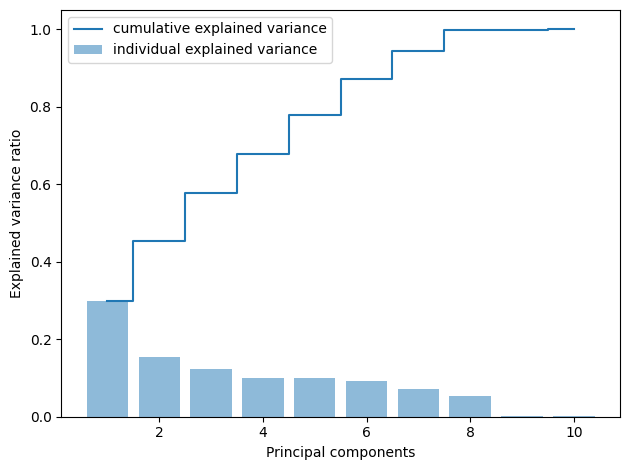

In [5]:
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

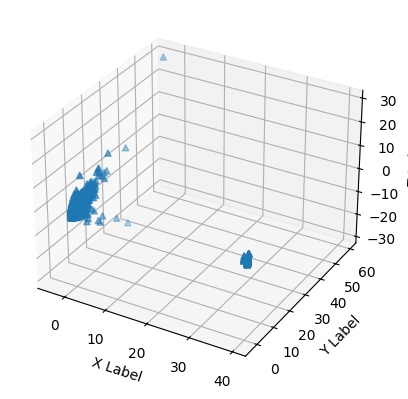

In [6]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],X_train_pca[:, 2],marker = '^') 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [7]:
X_train_pca_selected = X_train_pca[:,[0,2]]
X_test_pca_selected = X_test_pca[:,[0,2]]

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

## 1.1 LR

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('lr', LogisticRegression(C=1.0, penalty = "l1", random_state=1, solver = "liblinear", multi_class='ovr'))])

pipe_lr.fit(X,y)
print('Test Accuracy: %.3f' % pipe_lr.score(X, y))

Test Accuracy: 0.933


In [10]:
lr = LogisticRegression(C=1.0, penalty = "l1", random_state=1, solver = "liblinear", multi_class='ovr')
lr.fit(X_train_pca_selected, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

/var/folders/1s/gq5q_hsx1yqb2rtz9cll80f00000gn/T/ipykernel_35262/2164957510.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


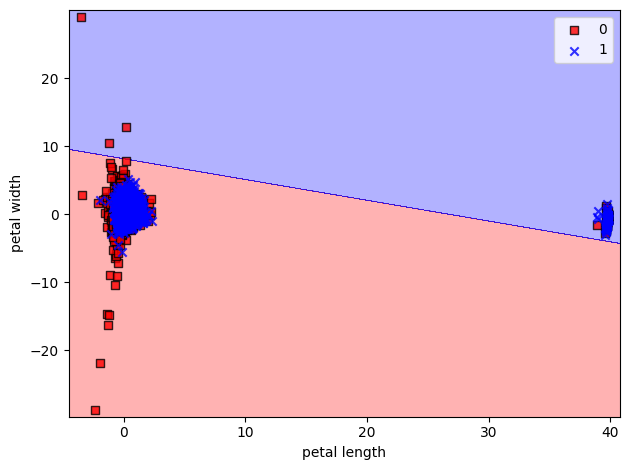

In [11]:
plot_decision_regions(X_train_pca_selected, y_train, classifier=lr)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 1.2 Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
depth = [3, 4, 5, 6, 7, 8, 9, 10]
acc_set = []
para_set  = []
for i in depth:
    tree_model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
    tree_model.fit(X_train_pca_selected, y_train)
    y_predict = tree_model.predict(X_train_pca_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)
    print('For k = {}, Test Accuracy: {:.3f}'.format(i, acc))

For k = 3, Test Accuracy: 0.936
For k = 4, Test Accuracy: 0.937
For k = 5, Test Accuracy: 0.937
For k = 6, Test Accuracy: 0.937
For k = 7, Test Accuracy: 0.938
For k = 8, Test Accuracy: 0.938
For k = 9, Test Accuracy: 0.939
For k = 10, Test Accuracy: 0.940


In [13]:
tr = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tr.fit(X_train_pca_selected, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

/var/folders/1s/gq5q_hsx1yqb2rtz9cll80f00000gn/T/ipykernel_35262/2164957510.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


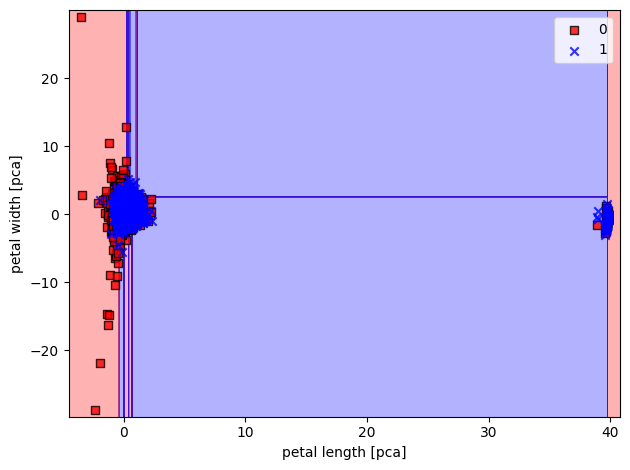

In [14]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree_model.fit(X_train_pca_selected, y_train)

plot_decision_regions(X_train_pca_selected, y_train,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [pca]')
plt.ylabel('petal width [pca]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 2. Pipeline

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_tree = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('tree_model', DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=1))])

pipe_tree.fit(X,y)
print('Test Accuracy: %.3f' % pipe_lr.score(X, y))

Test Accuracy: 0.933


# 3. Grid search with 5-fold cross-validation.

## 3.1 LR

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [2, 3, 4, 5],
    'lr__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}
grid_search = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: %.3f" % grid_search.best_score_)

Best parameters found:  {'lr__C': 0.01, 'pca__n_components': 2}
Best accuracy found: 0.933


## 3.2 Decision Tree

In [17]:
param_grid_tree = {
    'pca__n_components': [2, 3, 4, 5],  
    'tree_model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
}

grid_search_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid_tree, scoring='accuracy', cv=5)
grid_search_tree.fit(X, y)

print("Best parameters found: ", grid_search_tree.best_params_)
print("Best accuracy found: %.3f" % grid_search_tree.best_score_)

Best parameters found:  {'pca__n_components': 3, 'tree_model__max_depth': 4}
Best accuracy found: 0.936
